In [1]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import datetime

# Missing handling
import missingno as msno
from sklearn.impute import SimpleImputer

# logging
import logging
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Plotly
import plotly.graph_objects as go
import plotly.express as px

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# CA
import prince

# modeling
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import metrics

# set seaborn theme
sns.set()

In [2]:
# Example dataset: air quality
# Testing datetime format and missing data handling
air_quality = pd.read_csv('AirQualityUCI_req.csv')
air_quality['Datetime'] = air_quality['Date'] + " " + air_quality['Time']
del air_quality['Date'], air_quality['Time']
air_quality['text_number'] = '3'
air_quality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,text_number
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,10/03/2004 18:00:00,3
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,10/03/2004 19:00:00,3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,10/03/2004 20:00:00,3
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,10/03/2004 21:00:00,3
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,10/03/2004 22:00:00,3


In [3]:
# Example dataset: Adult Income
# Test: categorical data
income = pd.read_csv('adult.csv')
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Example dataset: Adult Income
# Test: categorical data
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = np.where(diabetes['Outcome'] == 1, 'Heart Disease', 'No Heart Disease')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Heart Disease
1,1,85,66,29,0,26.6,0.351,31,No Heart Disease
2,8,183,64,0,0,23.3,0.672,32,Heart Disease
3,1,89,66,23,94,28.1,0.167,21,No Heart Disease
4,0,137,40,35,168,43.1,2.288,33,Heart Disease


In [5]:
# Example dataset: mtcars
# Test: categorical data
mtcars = pd.read_csv('mtcars.csv')
del mtcars['model']
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# Example dataset: edible mushroom classification
# Test: categorical data

mushroom = pd.read_csv('mushroom.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# Example dataset: Heart Disease 
# Test: categorical data + numerical data

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Example dataset: California Housing 
# Test: regression

housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Project Outline

## Descriptive Statistics

###  Dataset Overview

1. Number of variables

2. Number of observations

3. Memory usage

## Missing Values

1. Visualize missing values using heatmap

2. Suggestions for handling missing value

## Variable Types

1. Print out current data types from Pandas

2. Type conversion suggestions: 

 * String datetime -> datetime
 
 * Small interger (for example: boolean)  -> categorical type
 
 * String float -> float
 
 * Maximum cardinality (number of unique == number of observations) -> remove

## Visualization

### Univariate plots

1. Histogram (for numerical data)

2. Count plot (for categorical data)

3. World cloud (for text data)

### Bivariate plots 

User can specify a categorical column for grouping. 

1. Correlation plots (heat map and scatter plot): for numerical and numerical data
    * Principal Component Analysis

2. Box plots: for numerical and categorical data

3. Relative frequency plots: for categorical and categorical data
    * Correspondence Analysis

4. Trend plot (connected scatterplot): if timeseries data is present


### Multivariate plots 

In [9]:
def datetime_validate(text):
    matched_format = 0
    for date_format in ['%Y-%m-%d', '%Y/%m/%d', '%m/%d/%Y', '%m-%d-%Y','%Y-%m-%d %H:%M:%S',
                        '%Y-%m-%d %H:%M:%S.%f', '%H:%M:%S', '%H:%M', '%Y/%m/%d %H:%M:%S',
                        '%Y/%m/%d %H:%M:%S.%f', '%m-%d-%Y %H:%M:%S', '%m/%d/%Y %H:%M:%S',
                        '%m-%d-%Y %H:%M:%S.%f', '%d-%m-%Y %H:%M:%S', '%d/%m/%Y %H:%M:%S']:
        try:
            datetime.datetime.strptime(text, date_format)
            matched_format += 1
        except ValueError:
            pass
    return matched_format > 0

def numeric_validate(text):
    return text.replace('.','',1).replace('-','',1).isdigit()

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    

def visualize_components(score, coeff, labels=None):
    # code modified from: https://github.com/ostwalprasad/ostwalprasad.github.io/blob/master/jupyterbooks/2019-01-20-PCA%20using%20python.ipynb
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize = (10, 10))
    pca_plot = sns.scatterplot(x = xs * scalex, y = ys * scaley, s=20)
    pca_plot.axes.set_title("PCA Biplot", fontsize=20)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, shape = 'full', width = 0.003)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    
    txt = '''Hint: Biplot contains two plots. 
    Scatter plot (blue points) which shows first two principal components.
    Loading vectors (red arrows) explains how much weight they have on that component, 
    angles between individual vectors tells about correlation between them.'''
    plt.figtext(0.5, 0.01, txt, wrap=True, fontsize=12, horizontalalignment='center')
    
    plt.show()
    
def feature_importance_plot(features = None, importances = None):
    features = features
    importances = importances
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [64]:
NUMERICS_TYPES = ['int', 'float', 'int32', 'float32', 'int64', 'float64']
CATEGORICAL_TYPES = [np.object]

class auto_eda():
    def __init__(self, df, target_variable = None):
        self.df = df.copy()
        self.target_variable = target_variable
        self.num_variables = self.df.shape[0]
        self.num_obs = self.df.shape[1]
        self.memory_usage = str(self.df.memory_usage(deep=True).sum() / 1000000) + ' Mb' # memory in mb
        self.numeric_cols = self.df.select_dtypes(include = NUMERICS_TYPES).columns.tolist()
        self.cat_cols = self.df.select_dtypes(include = CATEGORICAL_TYPES).columns.tolist()
        self.datetime_cols = self.df.select_dtypes(include = np.datetime64).columns.tolist()
        self.other_cols = self.df.select_dtypes(exclude = NUMERICS_TYPES + CATEGORICAL_TYPES).columns.tolist()
        self.encoder = None
        
    def get_samples(self, n = 3):
        if len(self.df) < n*3:
            return(self.df)
        head = self.df.head(n = n)
        tail = self.df.tail(n = n)
        random = self.df.sample(n = n, random_state = 42)
        samples = pd.concat([head, random, tail])
        return samples

    def get_overview(self):
        overview = {}
        overview['Number of Variables:'] = self.num_variables
        overview['Number of Observations:'] = self.num_obs
        overview['Memory Usage:'] = self.memory_usage
        for k,v in overview.items():
            print(k,v)
    
    def get_missings(self, missing_tag = None):
        '''
        Sometimes missing values are denoted with a number or string, 
        enter the missing tag to replace them with NAs
        '''
        if missing_tag is not None:
            self.df.replace(missing_tag, np.nan, inplace = True)
        
        # check if there are any null values
        if self.df.isnull().sum().sum() == 0:
            print('''There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values''')
        else:
            # missing heatmap display the missing values position in the dataset
            missing_heatmap = plt.figure(1)
            msno.matrix(self.df)
            plt.title('Missing Values shown in White',fontsize=25)

            # correlation plot: how strongly the presence or absence of one variable affects the presence of another
            correlation_plot = plt.figure(2)
            msno.heatmap(self.df,cbar= False)
            plt.title('Missing Values Correlation',fontsize=25)

            # The dendrogram uses a hierarchical clustering algorithm 
            # to bin variables against one another by their missing values correlation 
            missing_dendogram = plt.figure(3)
            msno.dendrogram(self.df)
            plt.title('Missing Values Dendrogram',fontsize=25)
        
    def handle_missings(self, strategy = None):
        '''
        PLEASE RUN get_missings() FIRST TO IDENTIFY MISSINGS.
        
        Handling missing values strategies:
        
        deletion: drop variables with > 70% missing and
        remove observations that contain at least 1 missing value.
        
        encode (Encoding imputation): for numerical variable, encoding missing entries as -999. 
        For categorical variable, encoding missing entries as string "unknown"
        
        mean_mode (Mean/mode imputation): for numerial variable, impute the missing entries with the mean, 
        For categorical variable, impute the missing entries with the mode
        
        '''
        strategies = ['deletion', 'encode', 'mean_mode']
        if self.df.isnull().sum().sum() == 0:
            print('There is no missing value in the dataset')
        elif strategy not in strategies:
            print('No strategy selected, please specify one of the following deletion, encode, or mean_mode')
        else:
            if strategy == 'deletion':
                # drop variable with > 70% missing
                percent_missing = self.df.isnull().sum() * 100 / len(self.df)
                drop_list = percent_missing[percent_missing > 70].index.tolist()
                self.df.drop(drop_list, axis = 1, inplace = True) 
                
                self.numeric_cols = self.df.select_dtypes(include = NUMERICS_TYPES).columns.tolist()
                self.cat_cols = self.df.select_dtypes(include = CATEGORICAL_TYPES).columns.tolist()
                
                # drop row contains 1 or more missing values
                drop_row_count = self.df.shape[0] - self.df.dropna().shape[0]
                rows_percentage = round(drop_row_count / self.df.shape[0] * 100, 1)
                self.df.dropna(inplace=True)
                
                print('Dropped columns: {}\nNumber of dropped rows: {} --> {}% of rows removed'.format(drop_list, drop_row_count, rows_percentage))
            
            elif strategy == 'encode':
                # encoding missing numerics as -999, categories as 'unknown'
                numerics_replaced = (len(self.df[self.numric_cols]) - self.df[self.numric_cols].count()).sum()
                self.df[self.numric_cols] = self.df[self.numric_cols].fillna(-999)
                
                cats_replaced = (len(self.df[self.cat_cols]) - self.df[self.cat_cols].count()).sum()
                self.df[self.cat_cols] = self.df[self.cat_cols].fillna('unknown')
                
                print('Count of encoded numerical values: {}\nCount of encoded categorical values: {}'.format(numerics_replaced, cats_replaced))
                
            elif strategy == 'mean_mode':
                # impute missing numerics with mean value
                numerics_replaced = (len(self.df[self.numric_cols]) - self.df[self.numric_cols].count()).sum()
                self.df[self.numric_cols] = self.df[self.numric_cols].fillna(self.df[self.numric_cols].mean())
                
                # impute missing categories with mode value
                cats_replaced = (len(self.df[self.cat_cols]) - self.df[self.cat_cols].count()).sum()
                self.df[self.cat_cols] = self.df[self.cat_cols].fillna(self.df[self.cat_cols].mode().iloc[0])
                
                print('Count of imputed numerical values: {}\nCount of imputed categorical values: {}'.format(numerics_replaced, cats_replaced))
    
    def check_data_type(self):
        column_series = self.df.dtypes.index
        type_series = self.df.dtypes.values
        cardinality = self.df.apply(pd.Series.nunique)
        
        frame = {'Column': column_series, 'Type': type_series, 'Cardinality': cardinality }
        data_types = pd.DataFrame(frame).reset_index(drop=True)
                
        high_cardinality_condition = (data_types['Cardinality'] > len(self.df)//2)
        low_cardinality_condition = (data_types['Cardinality'] < 13)
        no_cardinality_condition = (data_types['Cardinality'] == 1)
        
        # check cardinality
        data_types['Warning'] = np.where(no_cardinality_condition, 'no_cardinality',
                                         (np.where(low_cardinality_condition, 'low_cardinality', 
                                          np.where(high_cardinality_condition, 'high_cardinality', 'None'))))
        
        # check for date string
        data_types['Is_datetime'] = np.where(self.df.iloc[0].apply(str).apply(datetime_validate), 'yes', 'no')
        
        # check for string numbers
        data_types['String_number'] = np.where(self.df.iloc[0].apply(str).apply(numeric_validate), 'yes', 'no')
        
        # suggest better data type
        data_types['Suggest'] = np.where((data_types['Is_datetime'] == 'yes') & (data_types['Type'] == 'object'), 'converts to datetime',
                                         (np.where((data_types['Warning'] == 'low_cardinality') & (data_types['Type'].apply(is_numeric_dtype)), 'converts to object',
                                          np.where((data_types['String_number'] == 'yes') & (data_types['Type'] == np.float) & (data_types['Type'] == 'object'), 'converts to numeric', 'None'))))
        
        return data_types
                
    def change_data_type(self, alter_columns = 'all'):
        '''
        Change the data type according to the sugesstions in check_data_type()
        '''
        type_table = self.check_data_type()
        conversion_commands = {'converts to datetime': (lambda x: pd.to_datetime(x)),
                               'converts to numeric': (lambda x: pd.to_numeric(x)),
                              'converts to object': (lambda x: str(x))}
        if alter_columns == 'all':
            columns_to_change = type_table[type_table['Suggest'] != 'None'][['Column', 'Suggest']]
            for index, row in columns_to_change.iterrows():
                self.df[row['Column']] = self.df[row['Column']].apply(conversion_commands[row['Suggest']])
                print('Column {} {}'.format(row['Column'],row['Suggest']))
                
            self.numeric_cols = self.df.select_dtypes(include = NUMERICS_TYPES).columns.tolist()
            self.cat_cols = self.df.select_dtypes(include = CATEGORICAL_TYPES).columns.tolist()
            self.datetime_cols = self.df.select_dtypes(include = np.datetime64).columns.tolist()
            
#             for col in self.cat_cols:
#                 self.df[col] = self.df[col].astype('category')
        else:
            print('No column type changed')
            return None
        
    def histogram(self, kde = False):
        num_plots = len(self.numeric_cols)
        total_cols = 2
        total_rows = int(np.ceil(num_plots/total_cols)) 
        fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                                figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
        fig.suptitle('Histograms of Numerical Variables', fontsize = 20)
        for i, col in enumerate(self.numeric_cols):
            row = i//total_cols
            pos = i % total_cols
            p = sns.distplot(self.df[col],ax=axs[row][pos], kde = kde)
            p.set(title = col)
            p.set(xlabel=None)
            
    def count_plots(self):
        num_plots = len(self.cat_cols)
        if num_plots == 1:
            cplot = sns.countplot(self.df[self.cat_cols[0]])
            for p in cplot.patches:
                    cplot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        else:
            total_cols = 2
            total_rows = int(np.ceil(num_plots/total_cols))
            fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                                    figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
            fig.suptitle('Frequency Plot of Categorical Variables', fontsize = 20)
            for i, col in enumerate(self.cat_cols):
                row = i//total_cols
                pos = i % total_cols
                cplot = sns.countplot(self.df[col],ax=axs[row][pos]) # cplot = countplot
                cplot.set(title = col)
                cplot.set(xlabel=None)
                cplot.set(yticklabels=[])
                plt.setp(axs[row][pos].get_xticklabels(), rotation=30)
                
                for p in cplot.patches:
                    cplot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                
    def word_cloud(self):
        pass
    
    def correlation(self, target= None, show_all = True):
        '''
        Arguments:
        
        target: specify a categorcal column for color grouping
        
        show_all: display all plots
        
        Generate plots for correlation analysis. Only works with numerical columns.
        If number of columns is small (less than 10), pairplot is selected. Pearson correlation notated on the upper-left corner.
        Else if number of columns is > 10, Pearson Corr Heatmap is selected.
        '''
        if target is None:
            target = self.target_variable
        
        num_cols = self.numeric_cols
        if len(num_cols) > 10 or show_all == True:
            corr = self.df[num_cols].corr()
            cmap=sns.diverging_palette(5, 250, as_cmap=True)

            style_table = corr.style.background_gradient(cmap = cmap, axis=1)\
                .set_properties(**{'max-width': '60px', 'font-size': '10pt'})\
                .set_precision(2)
            
            display(style_table)
            
            cluster_plot = sns.clustermap(corr, cmap = cmap)
            cluster_plot.fig.suptitle("Hierarchical Structure in Correlation Matrix", y=1.05, fontsize=20)
            txt = '''
            
            Hint: Similarly correlated variables are grouped together (increase/decrease together).'''
            plt.figtext(0.5, 0.01, txt, wrap=True, fontsize=12, horizontalalignment='center')
            
        if len(num_cols) <= 10 or show_all == True:    
            pplot = sns.pairplot(self.df[num_cols], corner=True, diag_kind = 'kde') # pplot = pairplot
            pplot.map_lower(corrfunc)
            pplot.fig.suptitle("Pearson Correlation Matrix", y=1.05, fontsize=20)

            if target != None and self.df[target].dtype in CATEGORICAL_TYPES:
                num_cols_with_target = self.numeric_cols + [target]
                pplot2 = sns.pairplot(self.df[num_cols_with_target], corner=True, hue = target)
                pplot2.fig.suptitle("Grouped by: " + target, y=1.05, fontsize=20)
    
    def pca(self):
        '''
        input: dataframe of numerical columns
        output: 2 PCA components (PC1 and PC2)
        
        Principal component analysis (PCA) extracts 2 dimensional set of features from a high dimensional data set.
        Angles between individual vectors tells about correlation between them
        '''
        numeric_cols = self.numeric_cols
        if len(numeric_cols) < 3:
            print('PCA requires at least 3 numerical variables')
        else:
            scaled_df = StandardScaler().fit_transform(self.df[numeric_cols])
            scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols)

            pcamodel = PCA(n_components=5)
            pca = pcamodel.fit_transform(scaled_df)

            # create PCA scatter plot of the first two components
            # draw loading vectors 
            visualize_components(pca[:,0:2], coeff = np.transpose(pcamodel.components_[0:2, :]), labels = numeric_cols)
    
    
    def boxplots(self, target = None):
        if target is None:
            target = self.target_variable
        if target is None:
            print("Please specify a categorical column as x-axis using 'target' argument.")
        if self.df[target].dtype not in CATEGORICAL_TYPES:
            print("Target must be a categorical column.")
        else:
            num_plots = len(self.numeric_cols)
            total_cols = 2
            total_rows = int(np.ceil(num_plots/total_cols))
            fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                                    figsize=(7*total_cols, 5*total_rows), constrained_layout=True)
            fig.suptitle('Boxplots', fontsize = 20)
            for i, col in enumerate(self.numeric_cols):
                row = i//total_cols
                pos = i % total_cols
                bplot = sns.boxplot(x = self.df[target], y = self.df[col], ax=axs[row][pos])
                bplot.set(title = col + ' vs. ' + target)
                bplot.set_xlabel('')
                
    def cat_plots(self, target = None):
        if target is None:
            target = self.target_variable
        if target == None:
            print("Please specify a categorical column as x-axis using 'target' argument")
        if self.df[target].dtype not in CATEGORICAL_TYPES:
            print("Target must be a categorical column.")
        else:
            num_plots = len(self.cat_cols) - 1
            if num_plots == 0:
                print("Categorical plot requires at least 2 numerical variables")
            else:
                total_cols = 2
                total_rows = int(np.ceil(num_plots/total_cols))
                fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True)
                fig.suptitle('Categorical Frequency Plots of: ' + target, fontsize = 20)
                # exclude target variable
                non_target_list = [i for i in self.cat_cols if i != target]
                for i, col in enumerate(non_target_list):
                    row = i//total_cols
                    pos = i % total_cols

                    x = target
                    y = col
                    temp_df = self.df[self.cat_cols].groupby(x)[y].value_counts(normalize=True)
                    temp_df = temp_df.mul(100)
                    temp_df = temp_df.rename('percent').reset_index()

                    catplot = sns.barplot(x = x, y='percent', hue=y, data=temp_df, ax=axs[row][pos])
                    catplot.set(title = col + ' vs. ' + target)
                    catplot.set_ylim(0,100)
                    catplot.set_ylabel('')
                    catplot.set(yticklabels=[])

                    for p in catplot.patches:
                        txt = str(p.get_height().round(1)) + '%'
                        txt_x = p.get_x() 
                        txt_y = p.get_height()

                        # disable logging warning where percentage is na 
                        logging.disable(logging.WARNING)
                        catplot.text(txt_x, txt_y, txt)
                    
    def correspondence_analysis(self, target = None):
        if target is None:
            target = self.target_variable
        if target == None:
            print("Please specify a categorical column as x-axis using 'target' argument")
        if self.df[target].dtype not in CATEGORICAL_TYPES:
            print("Target must be a categorical column.")
        else:
            num_plots = len(self.cat_cols) - 1
            if num_plots == 0:
                print("Correspondence Analysis requires at least 2 numerical variables")
            else:
                total_cols = 2
                total_rows = int(np.ceil(num_plots/total_cols))
                fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
                fig.suptitle('Correspondence Analysis for column: ' + target, fontsize = 20)
                # exclude target variable
                non_target_list = [i for i in self.cat_cols if i != target]           
                for i, col in enumerate(non_target_list):
                    row = i//total_cols
                    pos = i % total_cols
                    X = self.df.copy()
                    X = pd.crosstab(X[col], X[target])

                    ca = prince.CA(
                         n_components=2,
                         n_iter=3,
                         copy=True,
                         check_input=True,
                         engine='auto',
                         random_state=42)


                    ca = ca.fit(X)

                    ax = ca.plot_coordinates(
                         X=X,
                         ax=axs[row][pos],
                         x_component=0,
                         y_component=1,
                         show_row_labels=True,
                         show_col_labels=True)
                    
    def timeseries_plots(self, grouper = 'W'):
        if len(self.datetime_cols) == 0:
            print('No datetime column detected. Make sure datetime64 type exist.')
        else:
            for i in range(len(self.datetime_cols)):
                grouped_timeseries = self.df.resample(grouper, on = self.datetime_cols[i]).mean().dropna()

                fig = go.Figure()
                # add trend plot for each numerical column
                for col in self.numeric_cols:
                    fig.add_trace(go.Scatter(x = grouped_timeseries.index, y = grouped_timeseries[col],
                                        mode = 'lines+markers',
                                        name = col))

                # Edit the layout
                fig.update_layout(title='Time Series plot of Numerical Variables')

                fig.show()

    def tree_model(self, target = None, max_depth = 3, target_class_names = None):
        if target is None:
            target = self.target_variable
        if target == None:
            print("Please specify a categorical column as x-axis using 'target' argument")
        else:
            encoded_df = self.df.copy()
            encoder_dict = defaultdict(LabelEncoder)
            labeled_housing = encoded_df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
            self.encoder = encoder_dict

            objList = self.cat_cols

            le = LabelEncoder()

            for col in objList:
                encoded_df[col] = le.fit_transform(encoded_df[col])
            
            target_name = target
            feature_names = [i for i in self.df.columns.tolist() if i != target]
            
            # Step 1 subset data into train and test set (75/25 split)
            X_train, X_test, y_train, y_test = train_test_split(encoded_df[feature_names], encoded_df[target_name], random_state=42)
            
            if self.df[target_name].dtype in CATEGORICAL_TYPES:
                # CATEGORICAL CLASSIFICATION:
                target_class_names = encoder_dict[target].classes_.tolist()
                
                # Step 2: Make an instance of the Model
                clf = DecisionTreeClassifier(random_state = 42, max_depth = max_depth)

                # Step 3: Train the model on the data
                clf.fit(X_train, y_train)

                # Step 4: Predict labels of unseen (test) data
                prediction = clf.predict(X_test)
                
                print('Classification Report on 25% of Testing Data:')
                print(classification_report(y_test, prediction, target_names=target_class_names))
                                
                #plot feature importances
                feature_importance_plot(features = feature_names, importances = clf.feature_importances_)

                # visualize tree
                import warnings
                warnings.simplefilter(action='ignore', category=FutureWarning)

                viz = dtreeviz(clf, 
                               X_train, 
                               y_train,
                               target_name = target,
                               feature_names = feature_names,
                               class_names = target_class_names)  

                return viz


            else:
                # NUMERICAL REGRESSION:
                regr = tree.DecisionTreeRegressor(max_depth = max_depth)

                # Step 3: Train the model on the data
                regr.fit(X_train, y_train)

                # Step 4: Predict labels of unseen (test) data
                prediction = regr.predict(X_test)
                
                print('Classification Report on 25% of Testing Data:')
                print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, prediction))
                print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, prediction))
                print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
                mape = np.mean(np.abs((y_test - prediction) / np.abs(y_test)))
                print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
                print('Accuracy:', round(100*(1 - mape), 2))
                
                #plot feature importances
                feature_importance_plot(features = feature_names, importances = regr.feature_importances_)

                # visualize tree

                import warnings
                warnings.simplefilter(action='ignore', category=FutureWarning)

                viz = dtreeviz(regr, 
                               X_train, 
                               y_train,
                               target_name = target,
                               feature_names = feature_names,
                               fancy=False)  

                return viz
                        
            

            


## Dataset Overview



In [65]:
a = auto_eda(diabetes, target_variable = 'Outcome')

In [66]:
a.get_samples()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Heart Disease
1,1,85,66,29,0,26.6,0.351,31,No Heart Disease
2,8,183,64,0,0,23.3,0.672,32,Heart Disease
668,6,98,58,33,190,34.0,0.430,43,No Heart Disease
324,2,112,75,32,0,35.7,0.148,21,No Heart Disease
624,2,108,64,0,0,30.8,0.158,21,No Heart Disease
765,5,121,72,23,112,26.2,0.245,30,No Heart Disease
766,1,126,60,0,0,30.1,0.349,47,Heart Disease
767,1,93,70,31,0,30.4,0.315,23,No Heart Disease


In [12]:
a.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [13]:
a.get_overview()

Number of Variables: 768
Number of Observations: 9
Memory Usage: 0.10454 Mb


## Missing Values

In [14]:
a.get_missings(missing_tag='?')

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


In [15]:
a.handle_missings(strategy = 'deletion')

There is no missing value in the dataset


In [16]:
a.get_missings()

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


## Variable Types

In [17]:
a.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,Pregnancies,int64,17,None,no,yes,None
1,Glucose,int64,136,None,no,yes,None
2,BloodPressure,int64,47,None,no,yes,None
3,SkinThickness,int64,51,None,no,yes,None
4,Insulin,int64,186,None,no,yes,None
5,BMI,float64,248,None,no,yes,None
6,DiabetesPedigreeFunction,float64,517,high_cardinality,no,yes,None
7,Age,int64,52,None,no,yes,None
8,Outcome,object,2,low_cardinality,no,no,None


In [18]:
a.change_data_type()

In [19]:
a.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [20]:
a.check_data_type()

,Column,Type,Cardinality,Warning,Is_datetime,String_number,Suggest
0,Pregnancies,int64,17,None,no,yes,None
1,Glucose,int64,136,None,no,yes,None
2,BloodPressure,int64,47,None,no,yes,None
3,SkinThickness,int64,51,None,no,yes,None
4,Insulin,int64,186,None,no,yes,None
5,BMI,float64,248,None,no,yes,None
6,DiabetesPedigreeFunction,float64,517,high_cardinality,no,yes,None
7,Age,int64,52,None,no,yes,None
8,Outcome,object,2,low_cardinality,no,no,None


## Visualization

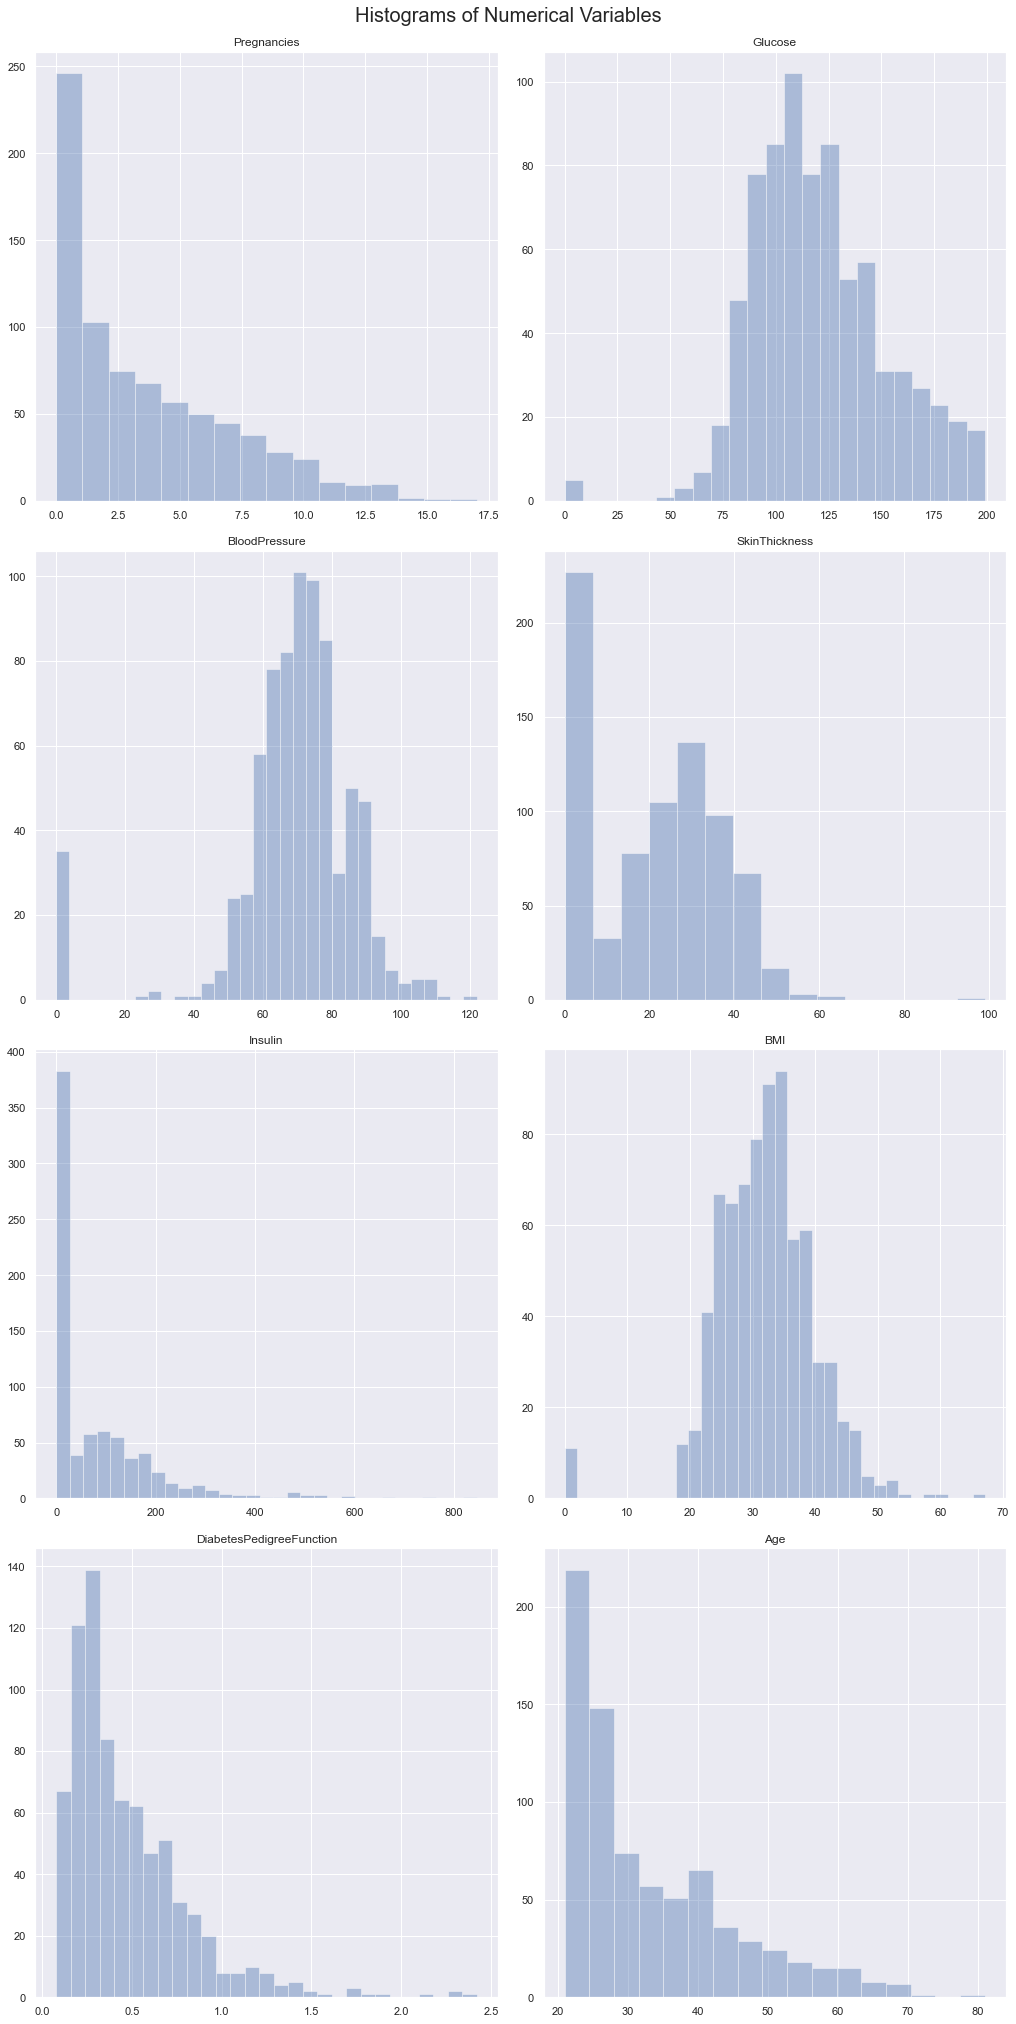

In [21]:
a.histogram()

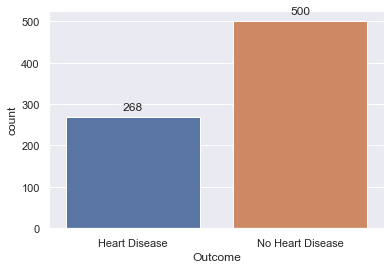

In [22]:
a.count_plots()

## Bivariate plots

### Correlation Plots

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


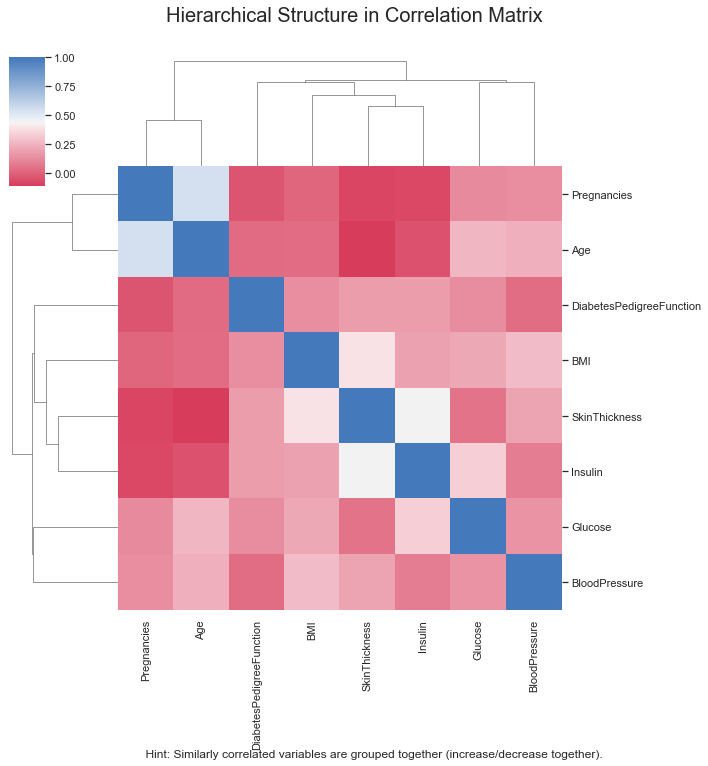

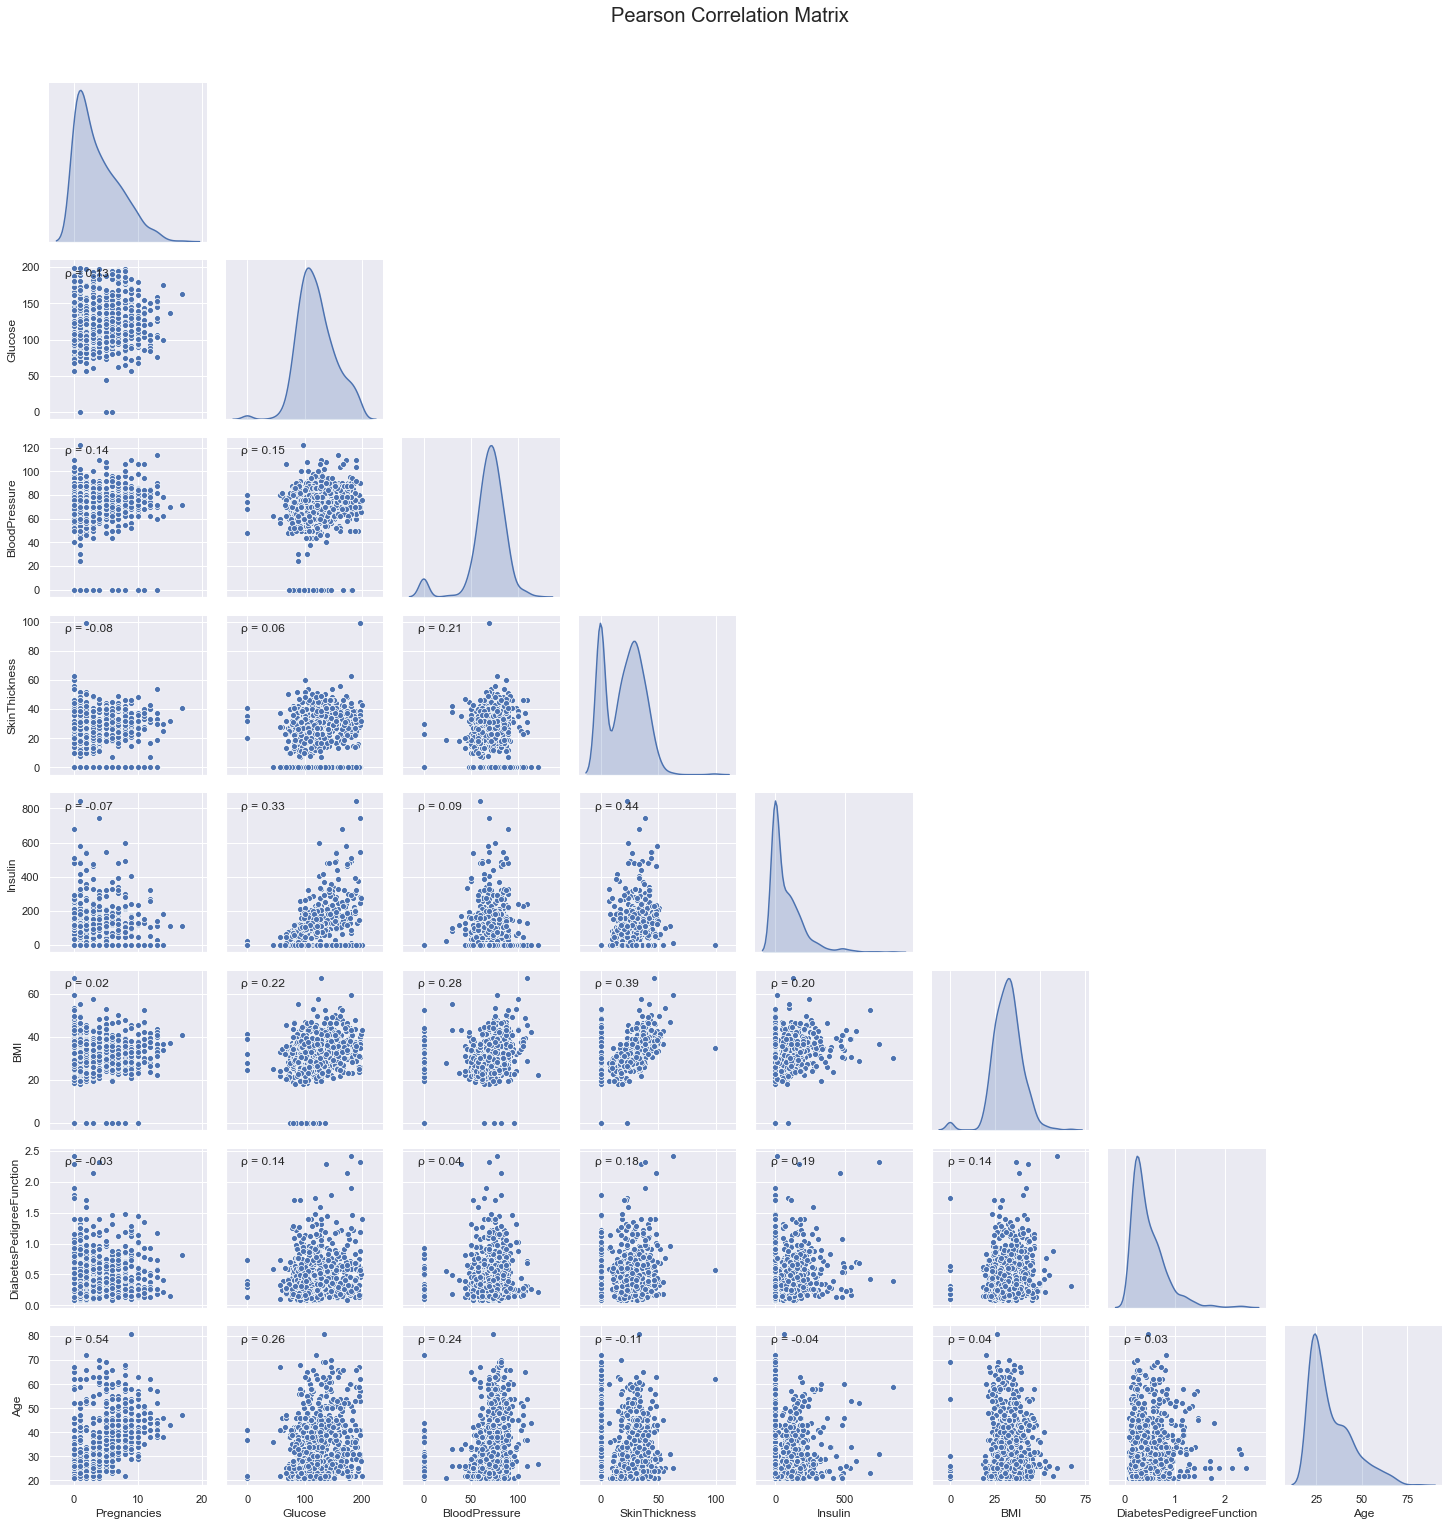

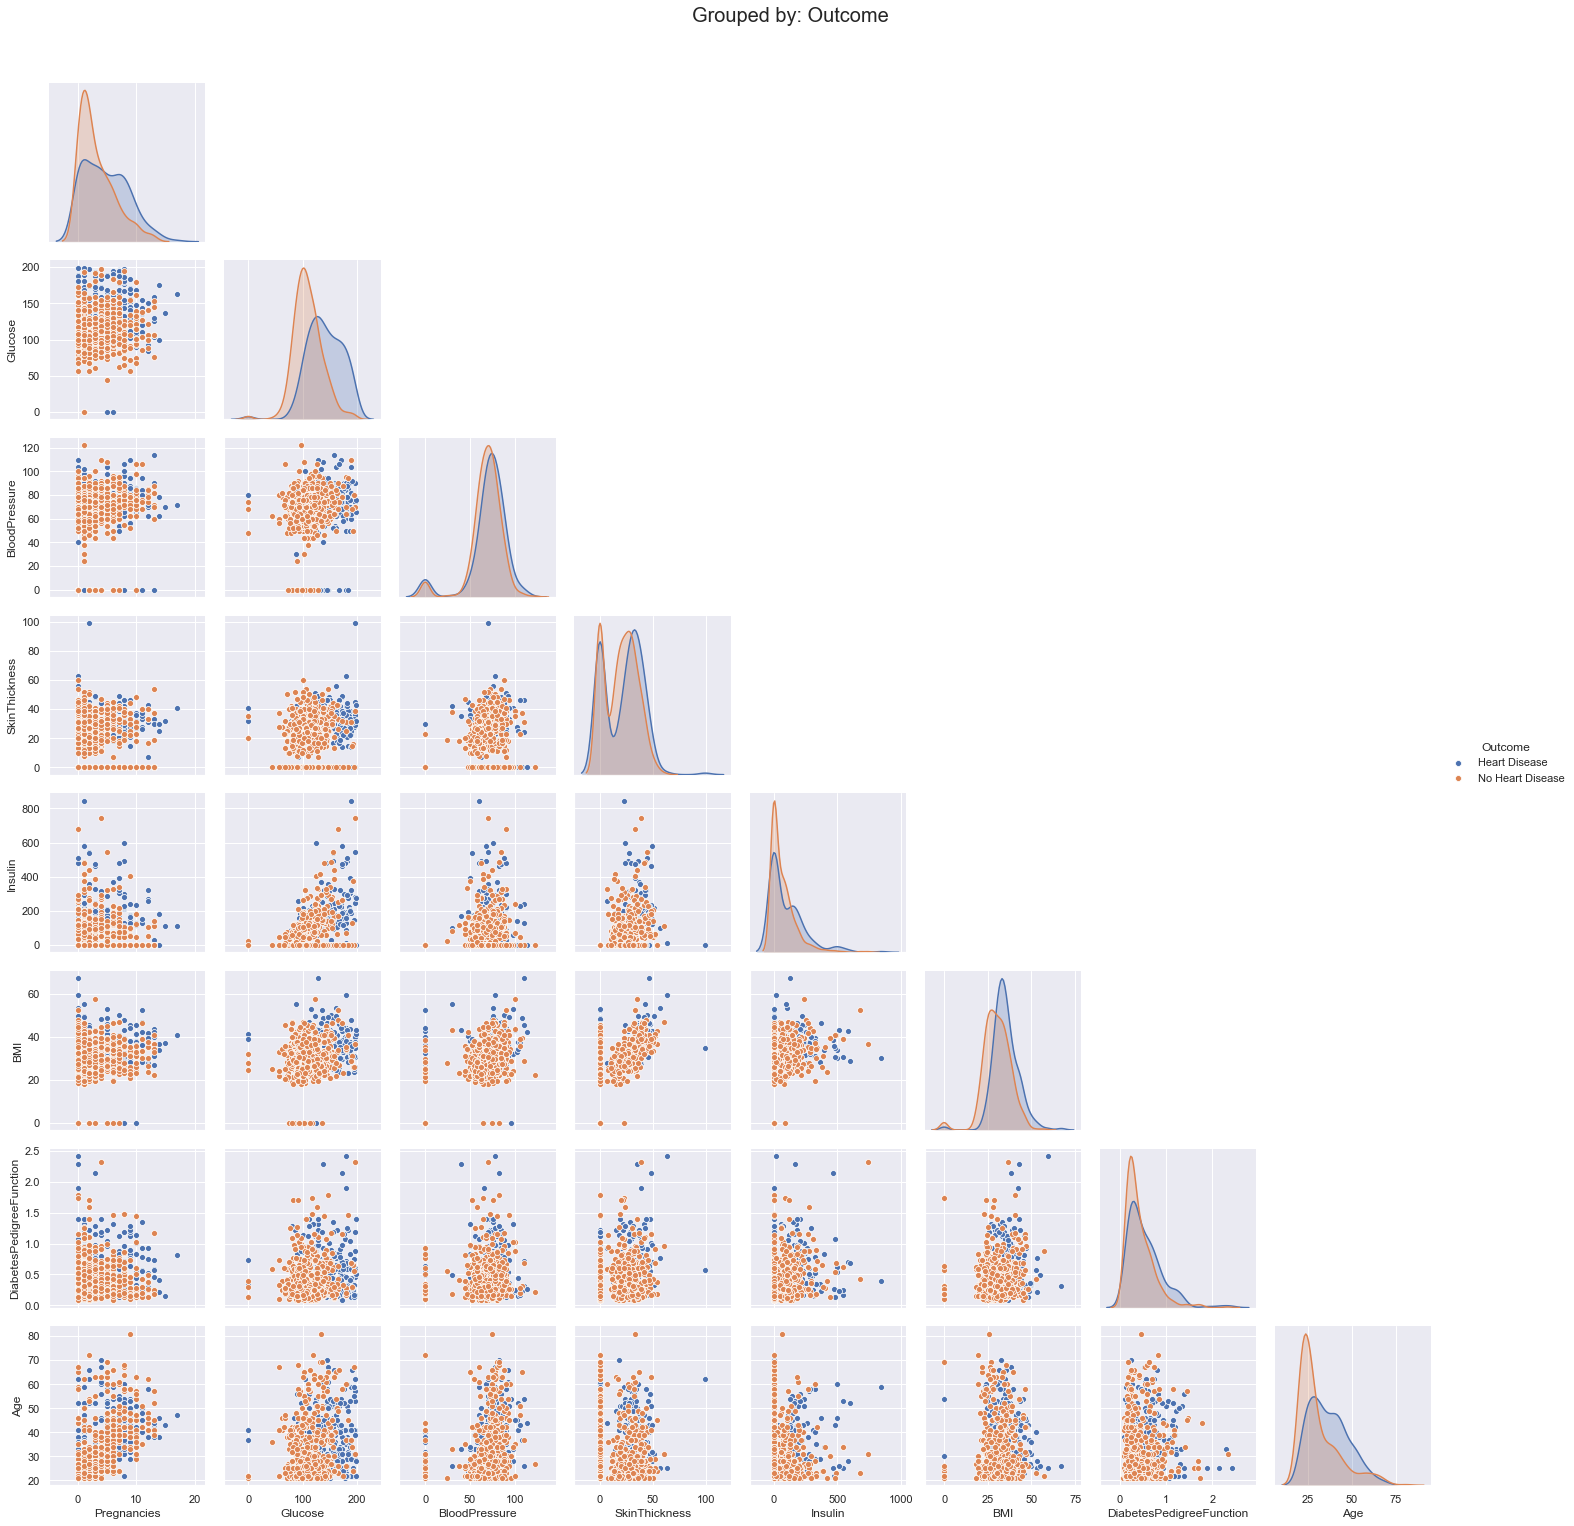

In [23]:
a.correlation()

### PCA plot

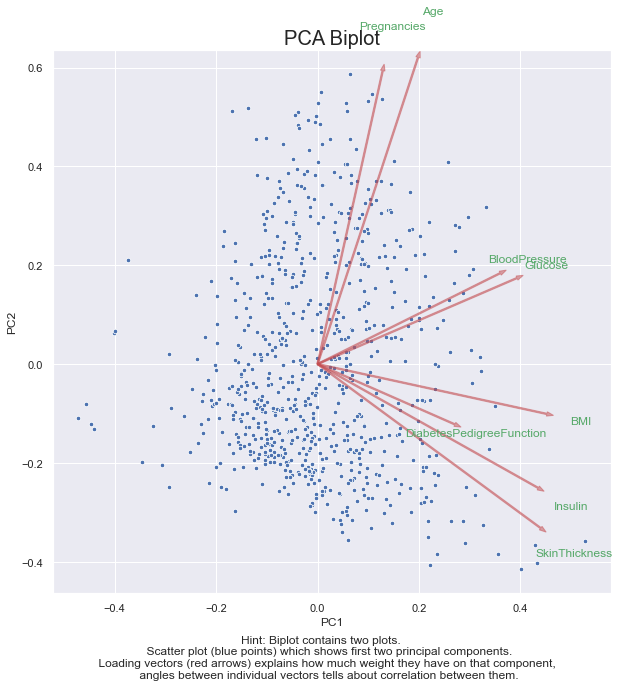

In [24]:
a.pca()

### Boxplots

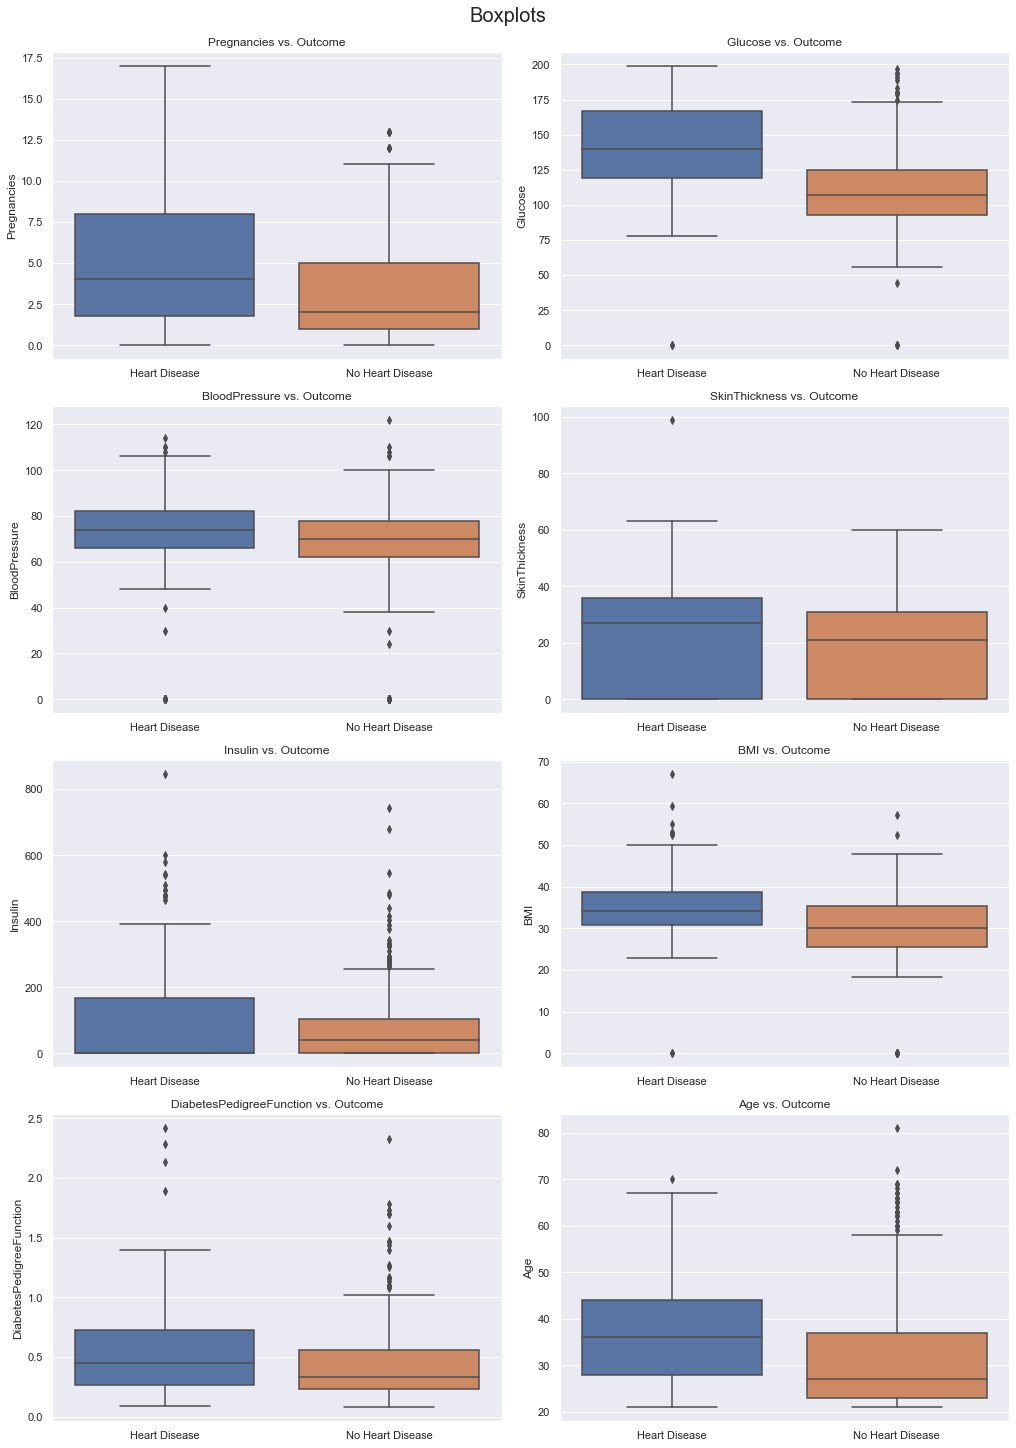

In [25]:
a.boxplots()

### Relative Frequency Plots

In [26]:
a.cat_plots()

Categorical plot requires at least 2 numerical variables


### Timeseries plot 

In [27]:
a.timeseries_plots(grouper = 'M')

No datetime column detected. Make sure datetime64 type exist.


### Correspondence Analysis

In [28]:
a.correspondence_analysis()

Correspondence Analysis requires at least 2 numerical variables


### Decision Tree Visualizer

Classification Report on 25% of Testing Data:
                  precision    recall  f1-score   support

   Heart Disease       0.63      0.48      0.55        69
No Heart Disease       0.74      0.85      0.79       123

        accuracy                           0.71       192
       macro avg       0.69      0.66      0.67       192
    weighted avg       0.70      0.71      0.70       192



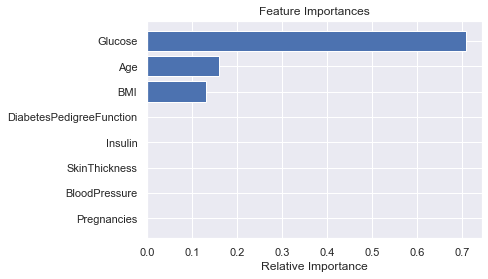

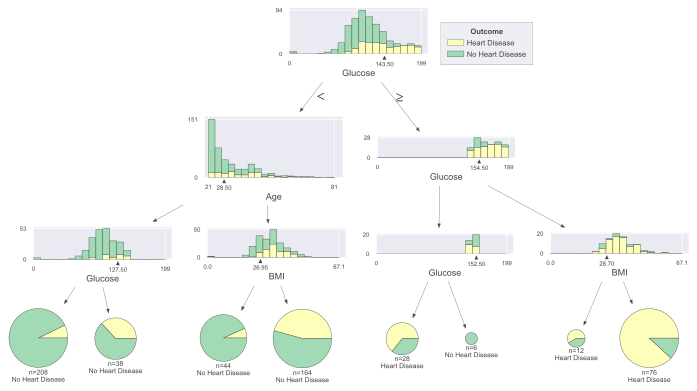

In [30]:
a.tree_model(max_depth = 3)